In [1]:
import pandas as pd
from textblob import TextBlob
import re
import time

In [2]:
# Cargamos el archivo de comentarios consolidado
# Por cierto, en los respectivos formularios, se ha 
# establecido que toda la información sea en MAYÚSCULAS
df = pd.read_excel("d:/archivos/encuestas.xlsx")
df

,CuantosFamilia,Estado,Vive Solo,Trabaja,DeptoProc,sexo,comentario
0,5,C,N,S,La Paz,Masculino,EL DESCONOCIMIENTO DEL CONTENIDO DE LA MATERIA...
1,4,S,N,N,La Paz,Femenino,ESTARÃ­A GENIAL SI HACEN MANTENIMIENTO A LAS M...
2,3,S,N,N,La Paz,Masculino,FALTA DE EQUIPOS(COMPUTADORAS EN MAL ESTADO O ...
3,5,S,N,N,Oruro,Femenino,LOS EXÃ¡MENES CONJUNTOS SON ESTRESANTES YA QUE...
4,7,S,S,S,La Paz,Femenino,PORQUE ARRASTRAN MATERIAS Y SE DESANIMAN
...,...,...,...,...,...,...,...
1495,4,S,N,N,La Paz,Femenino,FELICITAR A TODOS YA QUE NUESTRO ANIVERSARIO D...
1496,7,S,N,S,La Paz,Femenino,SE NECESITA DOTAR AL RECIÃ©N ESTUDIANTE UNIVER...
1497,3,S,N,N,La Paz,Masculino,ALGUNOS SE COMPLICAN EN LA MATERIAS DE PROGRAM...
1498,5,S,N,N,La Paz,Masculino,EXISTEN ALGUNOS DOCENTES QUE NO TE ENSEÃ±AN CO...


In [3]:
# Reemplazando todos los caracteres "compuestos" por vacios (expresiones regulares)
# asimismo los caracteres que corresponde a los acentos, los corregimos

#df["comentario"] = df["comentario"].str.replace(r"\W","")
df["comentario"] = df["comentario"].str.replace("Ã","Í")
df["comentario"] = df["comentario"].str.replace("Í¡","Á")
df["comentario"] = df["comentario"].str.replace("Í³","Ó")
df["comentario"] = df["comentario"].str.replace("Í©","É")
df["comentario"] = df["comentario"].str.replace("Í±","Ñ")
df["comentario"] = df["comentario"].str.replace("Íº","Ú")
df["comentario"] = df["comentario"].str.replace(","," ")
df

,CuantosFamilia,Estado,Vive Solo,Trabaja,DeptoProc,sexo,comentario
0,5,C,N,S,La Paz,Masculino,EL DESCONOCIMIENTO DEL CONTENIDO DE LA MATERIA...
1,4,S,N,N,La Paz,Femenino,ESTARÍ­A GENIAL SI HACEN MANTENIMIENTO A LAS M...
2,3,S,N,N,La Paz,Masculino,FALTA DE EQUIPOS(COMPUTADORAS EN MAL ESTADO O ...
3,5,S,N,N,Oruro,Femenino,LOS EXÁMENES CONJUNTOS SON ESTRESANTES YA QUE ...
4,7,S,S,S,La Paz,Femenino,PORQUE ARRASTRAN MATERIAS Y SE DESANIMAN
...,...,...,...,...,...,...,...
1495,4,S,N,N,La Paz,Femenino,FELICITAR A TODOS YA QUE NUESTRO ANIVERSARIO D...
1496,7,S,N,S,La Paz,Femenino,SE NECESITA DOTAR AL RECIÉN ESTUDIANTE UNIVERS...
1497,3,S,N,N,La Paz,Masculino,ALGUNOS SE COMPLICAN EN LA MATERIAS DE PROGRAM...
1498,5,S,N,N,La Paz,Masculino,EXISTEN ALGUNOS DOCENTES QUE NO TE ENSEÑAN COM...


In [4]:
# Estas son líneas que contienen esos caracteres y verificar que estan corregidas
# á 3
# é 130
# í 166
# ó 128
# ú 161
# ñ 146
df.iloc[1383]

CuantosFamilia                                                    4
Estado                                                            S
Vive Solo                                                         N
Trabaja                                                           N
DeptoProc                                                    La Paz
sexo                                                      Masculino
comentario        <IMG SRC="HTTPS://JERKDOLLS.COM/IMG/INNER/INTE...
Name: 1383, dtype: object

In [102]:
df.iloc[1383]['comentario']

'<IMG SRC="HTTPS://JERKDOLLS.COM/IMG/INNER/INTERRACIAL/INTERRACIAL_TOP.JPG" ALT="" WIDTH="400">'

In [100]:
def clean_texto(texto):
    #print(texto)
    texto=re.sub(r'HTTPS?:\/\/.*[\r\n]*','',texto)
    texto=re.sub(r'<IMG SRC.*[\r\n]*','',texto)
    #print(texto)
    return texto

In [101]:
clean_texto(df.iloc[1383]['comentario'])

''

In [48]:
salida = clean_texto(df.iloc[1383]['comentario'])
salida

''

In [13]:
def get_polaridad(texto):
    analysis = TextBlob(texto)
    if texto != '':
        if analysis.detect_language() == 'es':
            
            resultado = analysis.translate(from_lang='es', to='en').sentiment.polarity
            
            time.sleep(5)
            print(resultado)
def analiza(texto):
    analysis = TextBlob(texto)
    if texto != '':
        tt = analysis.translate(from_lang='es', to='en')
        #print(tt)
        #resultado = analysis.translate(from_lang='es', to='en').sentiment.polarity
        #print(resultado)
        #TextBlob(tt).sentiment
        #print(type(tt))
        
        ty=str(tt)
        #print(ty)
        #print(type(ty))
        #print(ty)
        return TextBlob(ty).sentiment
    

In [ ]:
#df['limpio'] = df['comentario'].apply(clean_texto)
#df.iloc[1383]
#get_polaridad("No me gusta el ajo")
r=analiza("ODIO EL CÓDIGO SPAGUETTI")
print(r)
print(type(r))

s=analiza("ME ENCANTA JAVASCRIPT")
print(s)
print(type(s))

#s=analiza("XD")
#print(s)
#print(type(s))


In [57]:
analizado=[]
for i in df["comentario"]:    
    try:
        if pd.isna(i):
            analizado.append("Sentiment(polarity=0.0, subjectivity=0.0)")
        elif i not in ("XD","XDDD","XDD") and "IFRAME" not in i:
            r=analiza( i )
            analizado.append(r)
        else:
            analizado.append("Sentiment(polarity=0.0, subjectivity=0.0)")
    except ValueError:
        analizado.append("Sentiment(polarity=0.0, subjectivity=0.0)")

In [58]:
print(len(analizado))

1500


In [56]:
print(df.iloc[540]["comentario"])
print(type(df.iloc[508]["comentario"]))

XDD
<class 'str'>


In [59]:
analizado

[Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.8, subjectivity=0.75),
 Sentiment(polarity=-0.003409090909090917, subjectivity=0.48863636363636365),
 Sentiment(polarity=-0.0625, subjectivity=0.53125),
 Sentiment(polarity=-0.1, subjectivity=0.07083333333333333),
 Sentiment(polarity=-0.1, subjectivity=0.07083333333333333),
 Sentiment(polarity=-0.075, subjectivity=0.5),
 Sentiment(polarity=-0.047619047619047616, subjectivity=0.6785714285714285),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.18697916666666667, subjectivity=0.36458333333333337),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.375, subjectivity=0.41666666666666663),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.5, subjectivity=0.5),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.10416666666666666, subjectivity=0.5208333333333333),
 Sentiment(polarity=0.0, subjectivity=0.15),
 Sentiment(po

In [60]:
df["analizado"]=analizado

In [62]:
df

,CuantosFamilia,Estado,Vive Solo,Trabaja,DeptoProc,sexo,comentario,analizado
0,5,C,N,S,La Paz,Masculino,EL DESCONOCIMIENTO DEL CONTENIDO DE LA MATERIA...,"(0.0, 0.0)"
1,4,S,N,N,La Paz,Femenino,ESTARÍ­A GENIAL SI HACEN MANTENIMIENTO A LAS M...,"(0.8, 0.75)"
2,3,S,N,N,La Paz,Masculino,FALTA DE EQUIPOS(COMPUTADORAS EN MAL ESTADO O ...,"(-0.003409090909090917, 0.48863636363636365)"
3,5,S,N,N,Oruro,Femenino,LOS EXÁMENES CONJUNTOS SON ESTRESANTES YA QUE ...,"(-0.0625, 0.53125)"
4,7,S,S,S,La Paz,Femenino,PORQUE ARRASTRAN MATERIAS Y SE DESANIMAN,"(-0.1, 0.07083333333333333)"
...,...,...,...,...,...,...,...,...
1495,4,S,N,N,La Paz,Femenino,FELICITAR A TODOS YA QUE NUESTRO ANIVERSARIO D...,"(0.0, 0.0)"
1496,7,S,N,S,La Paz,Femenino,SE NECESITA DOTAR AL RECIÉN ESTUDIANTE UNIVERS...,"(0.04545454545454545, 0.48484848484848486)"
1497,3,S,N,N,La Paz,Masculino,ALGUNOS SE COMPLICAN EN LA MATERIAS DE PROGRAM...,"(-0.5, 1.0)"
1498,5,S,N,N,La Paz,Masculino,EXISTEN ALGUNOS DOCENTES QUE NO TE ENSEÑAN COM...,"(0.0, 0.0)"


In [66]:
df.to_csv('d:/archivos/salida.csv', encoding='utf-8')

In [65]:
# Ejecucición del Programa de PreProcesado COMPLEMENTARIO

In [71]:
df = pd.read_excel("d:/archivos/procesado.xlsx")
df

,CuantosFamilia,Casado,Soltero,ViveSolo,Trabaja,LaPaz,Otros,Masculino,Femenino,comentario,Polaridad,Subjetividad
0,5,1,0,0,1,1,0,1,0,EL DESCONOCIMIENTO DEL CONTENIDO DE LA MATERIA...,0.000000,0.00
1,4,0,1,0,0,1,0,0,1,ESTARÍ­A GENIAL SI HACEN MANTENIMIENTO A LAS M...,0.800000,0.75
2,3,0,1,0,0,1,0,1,0,FALTA DE EQUIPOS(COMPUTADORAS EN MAL ESTADO O ...,-0.003409,0.49
3,5,0,1,0,0,0,1,0,1,LOS EXÁMENES CONJUNTOS SON ESTRESANTES YA QUE ...,-0.062500,0.53
4,7,0,1,1,1,1,0,0,1,PORQUE ARRASTRAN MATERIAS Y SE DESANIMAN,-0.100000,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4,0,1,0,0,1,0,0,1,FELICITAR A TODOS YA QUE NUESTRO ANIVERSARIO D...,0.000000,0.00
1496,7,0,1,0,1,1,0,0,1,SE NECESITA DOTAR AL RECIÉN ESTUDIANTE UNIVERS...,0.045455,0.48
1497,3,0,1,0,0,1,0,1,0,ALGUNOS SE COMPLICAN EN LA MATERIAS DE PROGRAM...,-0.500000,1.00
1498,5,0,1,0,0,1,0,1,0,EXISTEN ALGUNOS DOCENTES QUE NO TE ENSEÑAN COM...,0.000000,0.00


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from nltk.sentiment import SentimentIntensityAnalyzer

In [76]:
# Cargar los datos
data = pd.read_excel("d:/archivos/procesado.xlsx")

# Preprocesamiento de datos
# (En este ejemplo, solo nos enfocaremos en la columna 'comentario' y 'Polaridad')
data = data[['comentario', 'Polaridad']]

# Manejo de valores nulos (NaN)
data = data.dropna()

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(data['comentario'], data['Polaridad'], test_size=0.2, random_state=42)

# Extracción de características usando TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

# Realizar predicciones
predictions = model.predict(X_test_tfidf)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Ejemplo de predicción para un nuevo comentario
new_comment = "Este curso es genial, aprendí mucho"
new_comment_tfidf = vectorizer.transform([new_comment])
predicted_polarity = model.predict(new_comment_tfidf)
print(f'Predicted Polarity for "{new_comment}": {predicted_polarity[0]}')

Mean Squared Error: 0.007324880330075575
Predicted Polarity for "Este curso es genial, aprendí mucho": 0.1716678950688743


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from nltk.sentiment import SentimentIntensityAnalyzer

In [78]:
# Cargar los datos
data = pd.read_excel("d:/archivos/procesado.xlsx")

# Preprocesamiento de datos
data = data[['CuantosFamilia', 'Casado', 'Soltero', 'ViveSolo', 'Trabaja', 'LaPaz', 'Otros', 'Masculino', 'Femenino', 'comentario', 'Polaridad']]

# Manejo de valores nulos (NaN)
data = data.dropna()

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(data.drop('Polaridad', axis=1), data['Polaridad'], test_size=0.2, random_state=42)

# Definir las transformaciones para las variables categóricas y numéricas
numeric_features = ['CuantosFamilia']
categorical_features = ['Casado', 'Soltero', 'ViveSolo', 'Trabaja', 'LaPaz', 'Otros', 'Masculino', 'Femenino']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = TfidfVectorizer()

# Combinar las transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, 'comentario')
    ])

# Combinar preprocesamiento con modelo de regresión lineal en un solo pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Ejemplo de predicción para un nuevo comentario
new_data = pd.DataFrame({
    'CuantosFamilia': [5],
    'Casado': [1],
    'Soltero': [0],
    'ViveSolo': [0],
    'Trabaja': [1],
    'LaPaz': [1],
    'Otros': [0],
    'Masculino': [1],
    'Femenino': [0],
    'comentario': ["Nuevo comentario para predecir"]
})

new_prediction = model.predict(new_data)
print(f'Predicted Polarity for new data: {new_prediction[0]}')

Mean Squared Error: 0.0072510102333578135
Predicted Polarity for new data: 0.13519493228267476


In [80]:
from sklearn.ensemble import RandomForestRegressor

# Reemplaza el modelo lineal con un Bosque Aleatorio
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error with Random Forest: {mse}')

# Ejemplo de predicción para un nuevo comentario
new_prediction = model.predict(new_data)
print(f'Predicted Polarity for new data with Random Forest: {new_prediction[0]}')

Mean Squared Error with Random Forest: 0.00805162530829412
Predicted Polarity for new data with Random Forest: -0.0008749999999999995


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_excel("d:/archivos/procesado.xlsx")

# Preprocesamiento de datos
data = data[['ViveSolo', 'Trabaja', 'Masculino', 'Femenino', 'comentario', 'Polaridad']]

# Manejo de valores nulos (NaN)
data = data.dropna()

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(data.drop('Polaridad', axis=1), data['Polaridad'], test_size=0.2, random_state=42)

# Definir las transformaciones para las variables categóricas y numéricas
categorical_features = [ 'ViveSolo', 'Trabaja', 'Masculino', 'Femenino']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = TfidfVectorizer()

# Combinar las transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, 'comentario')
    ])

# Combinar preprocesamiento con modelo de bosque aleatorio en un solo pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42))])

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error with Random Forest: {mse}')

# Ejemplo de predicción para un nuevo comentario
new_data = pd.DataFrame({
    'ViveSolo': [0],
    'Trabaja': [1],
    'Masculino': [1],
    'Femenino': [0],
    'comentario': ["Nuevo comentario para predecir"]
})

new_prediction = model.predict(new_data)
print(f'Predicted Polarity for new data with Random Forest: {new_prediction[0]}')

Mean Squared Error with Random Forest: 0.024333840022444573
Predicted Polarity for new data with Random Forest: 0.02003221774666129


In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Definir las transformaciones para las variables categóricas y numéricas
numeric_features = ['CuantosFamilia']
categorical_features = ['Casado', 'Soltero', 'ViveSolo', 'Trabaja', 'LaPaz', 'Otros', 'Masculino', 'Femenino']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = TfidfVectorizer()

# Combinar las transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, 'comentario')
    ])

# Combinar preprocesamiento con modelo de bosque aleatorio en un solo pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42))])

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error with Random Forest: {mse}')

# Ejemplo de predicción para un nuevo comentario
new_data = pd.DataFrame({
    'CuantosFamilia': [5],
    'Casado': [1],
    'Soltero': [0],
    'ViveSolo': [0],
    'Trabaja': [1],
    'LaPaz': [1],
    'Otros': [0],
    'Masculino': [1],
    'Femenino': [0],
    'comentario': ["Nuevo comentario para predecir"]
})

new_prediction = model.predict(new_data)
print(f'Predicted Polarity for new data with Random Forest: {new_prediction[0]}')

Mean Squared Error with Random Forest: 0.024393492055482347
Predicted Polarity for new data with Random Forest: 0.020032217746661293


In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Definir las transformaciones para las variables categóricas y numéricas
numeric_features = ['CuantosFamilia']
categorical_features = [ 'ViveSolo', 'Trabaja', 'Masculino', 'Femenino']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = TfidfVectorizer()

# Combinar las transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, 'comentario')
    ])

# Combinar preprocesamiento con modelo de bosque aleatorio en un solo pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42))])

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error with Random Forest: {mse}')

# Ejemplo de predicción para un nuevo comentario
new_data = pd.DataFrame({
    'CuantosFamilia': [5],
    'ViveSolo': [0],
    'Trabaja': [1],
    'Masculino': [1],
    'Femenino': [0],
    'comentario': ["Nuevo comentario para predecir"]
})

new_prediction = model.predict(new_data)
print(f'Predicted Polarity for new data with Random Forest: {new_prediction[0]}')

Mean Squared Error with Random Forest: 0.024371617610700957
Predicted Polarity for new data with Random Forest: 0.020032217746661293


In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_excel("d:/archivos/procesado.xlsx")

# Preprocesamiento de datos
data = data[['Casado', 'Soltero', 'ViveSolo', 'Trabaja', 'LaPaz', 'Otros', 'Masculino', 'Femenino', 'comentario', 'Polaridad']]

# Manejo de valores nulos (NaN)
data = data.dropna()

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(data.drop('Polaridad', axis=1), data['Polaridad'], test_size=0.2, random_state=42)

# Definir las transformaciones para las variables categóricas y numéricas
categorical_features = ['Casado', 'Soltero', 'ViveSolo', 'Trabaja', 'LaPaz', 'Otros', 'Masculino', 'Femenino']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = TfidfVectorizer()

# Combinar las transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, 'comentario')
    ])

# Combinar preprocesamiento con modelo de SVM en un solo pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', SVR())])  # Puedes ajustar los hiperparámetros según sea necesario

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error with SVM: {mse}')

# Ejemplo de predicción para un nuevo comentario
new_data = pd.DataFrame({
    'Casado': [1],
    'Soltero': [0],
    'ViveSolo': [0],
    'Trabaja': [1],
    'LaPaz': [1],
    'Otros': [0],
    'Masculino': [1],
    'Femenino': [0],
    'comentario': ["Nuevo comentario para predecir"]
})

new_prediction = model.predict(new_data)
print(f'Predicted Polarity for new data with SVM: {new_prediction[0]}')

Mean Squared Error with SVM: 0.018007453263145082
Predicted Polarity for new data with SVM: 0.19124866712507405


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_excel("d:/archivos/procesado.xlsx")

# Preprocesamiento de datos
data = data[['Casado', 'Soltero', 'ViveSolo', 'Trabaja', 'Masculino', 'Femenino', 'comentario', 'Polaridad']]

# Manejo de valores nulos (NaN)
data = data.dropna()

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(data.drop('Polaridad', axis=1), data['Polaridad'], test_size=0.2, random_state=42)

# Definir las transformaciones para las variables categóricas y numéricas
categorical_features = ['Casado', 'Soltero', 'ViveSolo', 'Trabaja', 'Masculino', 'Femenino']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = TfidfVectorizer()

# Combinar las transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, 'comentario')
    ])

# Combinar preprocesamiento con modelo de SVM en un solo pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', SVR())])  # Puedes ajustar los hiperparámetros según sea necesario

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error with SVM: {mse}')

# Ejemplo de predicción para un nuevo comentario
new_data = pd.DataFrame({
    'Casado': [1],
    'Soltero': [0],
    'ViveSolo': [0],
    'Trabaja': [1],
    'Masculino': [1],
    'Femenino': [0],
    'comentario': ["Nuevo comentario para predecir"]
})

new_prediction = model.predict(new_data)
print(f'Predicted Polarity for new data with SVM: {new_prediction[0]}')

Mean Squared Error with SVM: 0.01632165850807652
Predicted Polarity for new data with SVM: 0.16897754264104087


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_excel("d:/archivos/procesado.xlsx")

# Preprocesamiento de datos
data = data[['Casado', 'ViveSolo', 'Trabaja', 'Masculino', 'Femenino', 'comentario', 'Polaridad']]

# Manejo de valores nulos (NaN)
data = data.dropna()

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(data.drop('Polaridad', axis=1), data['Polaridad'], test_size=0.2, random_state=42)

# Definir las transformaciones para las variables categóricas y numéricas
categorical_features = ['Casado', 'ViveSolo', 'Trabaja', 'Masculino', 'Femenino']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = TfidfVectorizer()

# Combinar las transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, 'comentario')
    ])

# Combinar preprocesamiento con modelo de SVM en un solo pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', SVR())])  # Puedes ajustar los hiperparámetros según sea necesario

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error with SVM: {mse}')

# Ejemplo de predicción para un nuevo comentario
new_data = pd.DataFrame({
    'Casado': [1],
    'ViveSolo': [0],
    'Trabaja': [1],
    'Masculino': [1],
    'Femenino': [0],
    'comentario': ["Nuevo comentario para predecir"]
})

new_prediction = model.predict(new_data)
print(f'Predicted Polarity for new data with SVM: {new_prediction[0]}')

Mean Squared Error with SVM: 0.01609278945272626
Predicted Polarity for new data with SVM: 0.1576443483331828


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_excel("d:/archivos/procesado.xlsx")

# Preprocesamiento de datos
data = data[['Casado', 'Soltero', 'ViveSolo', 'Trabaja', 'LaPaz', 'Otros', 'Masculino', 'Femenino', 'comentario', 'Polaridad']]

# Manejo de valores nulos (NaN)
data = data.dropna()

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(data.drop('Polaridad', axis=1), data['Polaridad'], test_size=0.2, random_state=42)

# Definir las transformaciones para las variables categóricas y numéricas
categorical_features = ['Casado', 'Soltero', 'ViveSolo', 'Trabaja', 'LaPaz', 'Otros', 'Masculino', 'Femenino']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = TfidfVectorizer()

# Combinar las transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, 'comentario')
    ])

# Combinar preprocesamiento con modelo de SVM en un solo pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', SVR())])  # Puedes ajustar los hiperparámetros según sea necesario

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener los coeficientes y la función de decisión
if hasattr(model.named_steps['regressor'], 'coef_'):
    # Si el modelo tiene coeficientes (kernel lineal)
    coefficients = model.named_steps['regressor'].coef_
    print(f'Coefficients: {coefficients}')

elif hasattr(model.named_steps['regressor'], 'support_vectors_'):
    # Si el modelo utiliza un kernel no lineal, podemos obtener los vectores de soporte y los multiplicadores de Lagrange
    support_vectors = model.named_steps['preprocessor'].transform(X_train)
    dual_coef = model.named_steps['regressor'].dual_coef_
    print(f'Support Vectors: {support_vectors}')
    print(f'Dual Coefficients: {dual_coef}')

# Ejemplo de predicción para un nuevo comentario
new_data = pd.DataFrame({
    'Casado': [1],
    'Soltero': [0],
    'ViveSolo': [0],
    'Trabaja': [1],
    'LaPaz': [1],
    'Otros': [0],
    'Masculino': [1],
    'Femenino': [0],
    'comentario': ["Nuevo comentario para predecir"]
})

new_prediction = model.predict(new_data)
print(f'Predicted Polarity for new data with SVM: {new_prediction[0]}')

Support Vectors:   (0, 0)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 6)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 13)	1.0
  (0, 14)	1.0
  (0, 196)	0.25883943586489594
  (0, 277)	0.31602439767608265
  (0, 375)	0.17638710793436063
  (0, 475)	0.09269886900189894
  (0, 509)	0.3609451604634693
  (0, 714)	0.35095512325890216
  (0, 753)	0.1561201496494565
  (0, 971)	0.33116426639062824
  (0, 1033)	0.12174521688302989
  (0, 1096)	0.2494910569883569
  (0, 1196)	0.29943813329900587
  (0, 1251)	0.15589155342758343
  (0, 1428)	0.26610189276064056
  (0, 1733)	0.3795889615164444
  (1, 0)	1.0
  (1, 3)	1.0
  (1, 4)	1.0
  :	:
  (1155, 1365)	0.17915712412680931
  (1155, 1388)	0.20502141760794315
  (1155, 1418)	0.16457803853449382
  (1155, 1582)	0.32166213121850523
  (1155, 1644)	0.14979651482486797
  (1155, 1713)	0.11904890184837524
  (1155, 1714)	0.11267635945798704
  (1156, 0)	1.0
  (1156, 3)	1.0
  (1156, 4)	1.0
  (1156, 6)	1.0
  (1156, 9)	1.0
  (1156, 10)	1.0
  (1156, 13)	1.0
  (1156, 14)	1.0
  (1156, 372)	0.381

# Cuántos Positivos y Negativos tenemos?

In [10]:
data[data.Polaridad>0.1][['comentario','Polaridad']].head(20)

,comentario,Polaridad
1,ESTARÍ­A GENIAL SI HACEN MANTENIMIENTO A LAS M...,0.800000
10,PRIMERO PUEDE SER LA AGLOMERACION DE EL AULA T...,0.186979
12,MUCHOS DE PRIMER SEMESTRE NO CUENTAN CON UNA P...,0.375000
14,EXAMENES GRUPALES QUE GENERAN AUN MAS DESBORDA...,0.500000
16,POR QUE A MUCHOS LES CUESTA APRENDER MATEMÁTICAS,0.104167
18,CREO QUE EL SISTEMA PÚBLICO HACE MUCHO DAÑO EN...,0.133333
25,MI EXPERIENCIA EN EL PRIMER AÑO DE INGENIERÍ­A...,0.125000
26,MAYOR MENTE POR PROBLEMAS ECONÓMICOS Y FALTA D...,0.191667
27,PROBLEMAS FAMILIARES Y ECONÓMICOS,0.200000
29,LA MAYORÍ­A DE LOS ESTUDIANTES DECIDEN DEJAR L...,0.500000


In [11]:
data[data.Polaridad<0][['comentario','Polaridad']].head(20)

,comentario,Polaridad
2,FALTA DE EQUIPOS(COMPUTADORAS EN MAL ESTADO O ...,-0.003409
3,LOS EXÁMENES CONJUNTOS SON ESTRESANTES YA QUE ...,-0.062500
4,PORQUE ARRASTRAN MATERIAS Y SE DESANIMAN,-0.100000
5,PORQUE ARRASTRAN MATERIAS Y SE DESANIMAN,-0.100000
6,GENERALMENTE ES PORQUE LAS MATERIAS SON ALGO P...,-0.075000
7,LA CANTIDAD EXAGERADA DE ESTUDIANTES POR PARAL...,-0.047619
22,EXPECTATIVAS POCO REALISTAS SOBRE LA CARGA DE ...,-0.500000
23,UNA MALA ENSEÑANZA,-0.700000
44,LOS AMBIENTES SON PEQUEÑOS NO HAY SUFICIENTE ...,-0.125000
52,INFLUJE MUCHO LA METODOLOGIA DE ENSEÍ‘ANZA EN ...,-0.400000


In [6]:
umbral_inferior = -0.3
umbral_superior = 0.3

# Calcular el número de predicciones positivas
positivas = sum((data['Polaridad'] >= umbral_superior))

# Calcular el número de predicciones negativas
negativas = sum((data['Polaridad'] <= umbral_inferior))

# Calcular el número de predicciones neutrales (entre los umbrales)
neutrales = len(data['Polaridad']) - positivas - negativas

print(f'Predicciones positivas: {positivas}')
print(f'Predicciones negativas: {negativas}')
print(f'Predicciones neutrales: {neutrales}')

Predicciones positivas: 266
Predicciones negativas: 53
Predicciones neutrales: 1128


In [7]:
umbral_inferior = -0.1
umbral_superior = 0.1

# Calcular el número de predicciones positivas
positivas = sum((data['Polaridad'] >= umbral_superior))

# Calcular el número de predicciones negativas
negativas = sum((data['Polaridad'] <= umbral_inferior))

# Calcular el número de predicciones neutrales (entre los umbrales)
neutrales = len(data['Polaridad']) - positivas - negativas

print(f'Predicciones positivas: {positivas}')
print(f'Predicciones negativas: {negativas}')
print(f'Predicciones neutrales: {neutrales}')

Predicciones positivas: 439
Predicciones negativas: 168
Predicciones neutrales: 840


In [8]:
umbral_inferior = -0.05
umbral_superior = 0.05

# Calcular el número de predicciones positivas
positivas = sum((data['Polaridad'] >= umbral_superior))

# Calcular el número de predicciones negativas
negativas = sum((data['Polaridad'] <= umbral_inferior))

# Calcular el número de predicciones neutrales (entre los umbrales)
neutrales = len(data['Polaridad']) - positivas - negativas

print(f'Predicciones positivas: {positivas}')
print(f'Predicciones negativas: {negativas}')
print(f'Predicciones neutrales: {neutrales}')

Predicciones positivas: 497
Predicciones negativas: 219
Predicciones neutrales: 731


In [13]:
def x_rango(x):
    if x>0:
        return 1
    elif x==0:
        return 0
    else:
        return -1
data['resultado']= data['Polaridad'].apply(x_rango)

In [15]:
data.head()

,Casado,Soltero,ViveSolo,Trabaja,LaPaz,Otros,Masculino,Femenino,comentario,Polaridad,resultado
0,1,0,0,1,1,0,1,0,EL DESCONOCIMIENTO DEL CONTENIDO DE LA MATERIA...,0.000000,0
1,0,1,0,0,1,0,0,1,ESTARÍ­A GENIAL SI HACEN MANTENIMIENTO A LAS M...,0.800000,1
2,0,1,0,0,1,0,1,0,FALTA DE EQUIPOS(COMPUTADORAS EN MAL ESTADO O ...,-0.003409,-1
3,0,1,0,0,0,1,0,1,LOS EXÁMENES CONJUNTOS SON ESTRESANTES YA QUE ...,-0.062500,-1
4,0,1,1,1,1,0,0,1,PORQUE ARRASTRAN MATERIAS Y SE DESANIMAN,-0.100000,-1


In [16]:
data['resultado'].value_counts()

 0    682
 1    523
-1    242
Name: resultado, dtype: int64

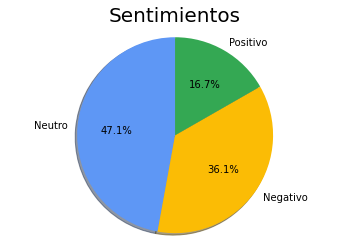

In [19]:
import matplotlib.pyplot as plt
etiquetas = ['Neutro','Negativo','Positivo']
colores = ['#29A0B1','#167D7F','#98D7C2']
colores = ['#5e97f5','#fbbc05','#34a853']
plt.pie(data['resultado'].value_counts(), labels=etiquetas, colors=colores,
       autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Sentimientos', fontsize=20)
plt.axis('equal')
plt.show()

# Ahora una Nube de Términos

In [37]:
from wordcloud import WordCloud
textos = ' '.join(data.comentario)
textos

TypeError: sequence item 107: expected str instance, float found

In [38]:
len(textos)

12764

In [36]:
data = pd.read_excel("d:/archivos/procesado.xlsx")
data

,CuantosFamilia,Casado,Soltero,ViveSolo,Trabaja,LaPaz,Otros,Masculino,Femenino,comentario,Polaridad,Subjetividad
0,5,1,0,0,1,1,0,1,0,EL DESCONOCIMIENTO DEL CONTENIDO DE LA MATERIA...,0.000000,0.00
1,4,0,1,0,0,1,0,0,1,ESTARÍ­A GENIAL SI HACEN MANTENIMIENTO A LAS M...,0.800000,0.75
2,3,0,1,0,0,1,0,1,0,FALTA DE EQUIPOS(COMPUTADORAS EN MAL ESTADO O ...,-0.003409,0.49
3,5,0,1,0,0,0,1,0,1,LOS EXÁMENES CONJUNTOS SON ESTRESANTES YA QUE ...,-0.062500,0.53
4,7,0,1,1,1,1,0,0,1,PORQUE ARRASTRAN MATERIAS Y SE DESANIMAN,-0.100000,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4,0,1,0,0,1,0,0,1,FELICITAR A TODOS YA QUE NUESTRO ANIVERSARIO D...,0.000000,0.00
1496,7,0,1,0,1,1,0,0,1,SE NECESITA DOTAR AL RECIÉN ESTUDIANTE UNIVERS...,0.045455,0.48
1497,3,0,1,0,0,1,0,1,0,ALGUNOS SE COMPLICAN EN LA MATERIAS DE PROGRAM...,-0.500000,1.00
1498,5,0,1,0,0,1,0,1,0,EXISTEN ALGUNOS DOCENTES QUE NO TE ENSEÑAN COM...,0.000000,0.00


In [41]:
import re

def limpiar_texto(texto):
    # Eliminar emojis
    texto_sin_emojis = texto.encode('ascii', 'ignore').decode('ascii')

    # Eliminar caracteres especiales excepto letras y espacios
    texto_limpio = re.sub(r'[^a-zA-Z\s]', '', texto_sin_emojis)

    return texto_limpio

# Ejemplo de uso
textos = limpiar_texto(textos) 
#print(textos)
print(len(textos))

12764


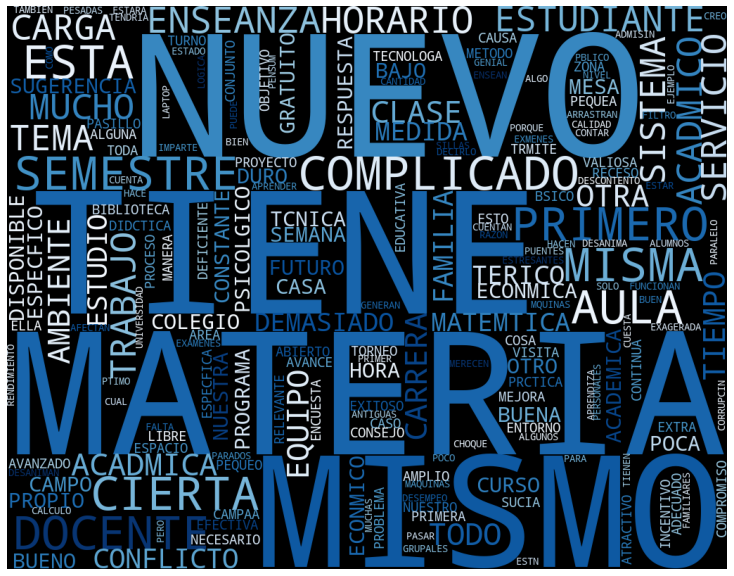

In [25]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

# Crear una instancia de WordCloud sin especificar una fuente externa
wc = WordCloud(width=1024, height=800, margin=0, colormap='Blues', min_font_size=14, font_path=None).generate(textos)
wc
#plt.imshow(wc)
plt.figure(figsize=(10, 8), facecolor=None)  # Ajustar también el tamaño de la figura
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)

# Mostrar la nube de palabras
plt.show()

In [49]:
resto=data[data['CuantosFamilia'] > 4].comentario

resto = pd.DataFrame(resto)
resto

,comentario
0,EL DESCONOCIMIENTO DEL CONTENIDO DE LA MATERIA...
3,LOS EXÁMENES CONJUNTOS SON ESTRESANTES YA QUE ...
4,PORQUE ARRASTRAN MATERIAS Y SE DESANIMAN
6,GENERALMENTE ES PORQUE LAS MATERIAS SON ALGO P...
7,LA CANTIDAD EXAGERADA DE ESTUDIANTES POR PARAL...
...,...
1489,NaN
1490,OFRECER RECURSOS EN LÍ­NEA PARA ACCESO A LIBRO...
1496,SE NECESITA DOTAR AL RECIÉN ESTUDIANTE UNIVERS...
1498,EXISTEN ALGUNOS DOCENTES QUE NO TE ENSEÑAN COM...


In [44]:
resto

0       EL DESCONOCIMIENTO DEL CONTENIDO DE LA MATERIA...
3       LOS EXÁMENES CONJUNTOS SON ESTRESANTES YA QUE ...
4               PORQUE ARRASTRAN MATERIAS Y SE DESANIMAN 
6       GENERALMENTE ES PORQUE LAS MATERIAS SON ALGO P...
7       LA CANTIDAD EXAGERADA DE ESTUDIANTES POR PARAL...
                              ...                        
1489                                                  NaN
1490    OFRECER RECURSOS EN LÍ­NEA PARA ACCESO A LIBRO...
1496    SE NECESITA DOTAR AL RECIÉN ESTUDIANTE UNIVERS...
1498    EXISTEN ALGUNOS DOCENTES QUE NO TE ENSEÑAN COM...
1499    ALGUNOS INGENIEROS NO DOMINAN SU MATERIA NO ES...
Name: comentario, Length: 701, dtype: object

In [50]:
from wordcloud import WordCloud
textos = ' '.join(resto.comentario)
textos

TypeError: sequence item 56: expected str instance, float found

In [31]:
len(textos)

12764

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
# Cargar los datos
#dw = pd.read_csv("d:/archivos/lista.csv")
dw = pd.read_csv("d:/archivos/procesados.csv")
dw

,CONTENIDO
0,MATERIA
1,EJEMPLO
2,NIVEL
3,CALCULO
4,ESTARA
...,...
1513,ESTABLECER
1514,CAFETERA
1515,ESPERAMOS
1516,FOMENTEN


In [12]:
textos = ' '.join(dw.CONTENIDO)
textos

'MATERIA EJEMPLO NIVEL CALCULO ESTARA GENIAL HACEN MAQUINAS ALGUNAS FUNCIONAN FALTA ESTADO TIENEN DESEMPEO PTIMO MUCHAS MATERIAS NUEVO PENSUM CUAL AULAS PEQUEAS PARA CANTIDAD ALUMNOS TIENE EXMENES CONJUNTOS ESTRESANTES MUCHOS DOCENTES ENSEAN MISMO ESTN PERO OTRAS HACE COMPLICADO PORQUE ARRASTRAN DESANIMAN ALGO PESADAS DESANIMA EXAGERADA ESTUDIANTES PARALELO SOLO CIERTA SILLAS MQUINAS DISPONIBLES ESTA RAZON PASAR CLASES PARADOS APRENDIZA DOCENTE PRIMERO PUEDE AULA TENDRIA POCO COMO TAMBIEN BUEN IMPARTE MISMA ANTIGUAS ENSEANZAS DECIRLO LOGICA PRIMER SEMESTRE CUENTAN LAPTOP DESCONTENTO CALIDAD ENSEANZA ALGUNOS EXAMENES GRUPALES GENERAN CONTAR HORARIO BIEN ESTUDIANTE CUENTA HORARIOS PUENTES CHOQUE CUESTA APRENDER MATEMTICAS PROBLEMAS PERSONALES FAMILIARES AFECTAN RENDIMIENTO ACADMICO CREO SISTEMA PBLICO MUCHO TEMA CORRUPCIN MERECEN ESTAR UNIVERSIDAD FILTRO ADMISIN BSICOS VECES CUANDO LLEVAMOS TEMAS AVANZADOS COMPAEROS SABEN EQUIPOS LIMITA PRACTICAS LGICA PROGRAMACIN REALISTAS SOBRE CARGA T

In [63]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


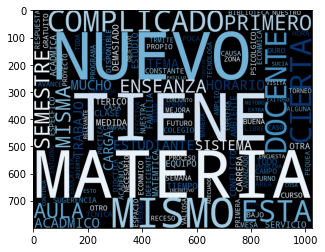

In [15]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

# Crear una instancia de WordCloud sin especificar una fuente externa
wc = WordCloud(width=1024, height=800, margin=0, colormap='Blues', min_font_size=14, font_path=None).generate(textos)
wc
plt.imshow(wc)


In [48]:
X_test

,Casado,Soltero,ViveSolo,Trabaja,LaPaz,Otros,Masculino,Femenino,comentario
1062,0,1,0,0,1,0,0,1,FACILITAR RECURSOS Y APOYO PARA PROYECTOS DE I...
400,0,1,0,0,1,0,1,0,QUE HAYGA MÁS COMPUTADORAS EN LOS LABORATIOS Y...
874,0,1,1,0,1,0,1,0,PERCEPCIÓN DE QUE EL CENTRO DE ESTUDIANTES NO ...
446,0,1,0,1,1,0,1,0,FALTA DE LIDERAZGO EFECTIVO: LA DIRECCIÓN DEL ...
199,0,1,0,0,1,0,0,1,AUMENTAR LA INFRAESTRUCTURA
...,...,...,...,...,...,...,...,...,...
826,0,1,0,1,1,0,1,0,COLOCAR VENTILADORES A LAS AULAS.
592,0,1,0,0,1,0,0,1,MÁS MOTIVACIÓN PARA LOS ESTUDIANTES
86,0,1,0,0,1,0,1,0,FALTA DE APOYO Y AYUDA ECONÓMICA MÁS QUE TODO ...
1425,0,1,1,0,0,1,0,1,COMUNICAR TODAS LAS ACTIVIDADES A LAS QUE LA U...


In [49]:
y_train

497     0.500000
1483   -0.100000
399     0.000000
1132    0.500000
1169   -0.112500
          ...   
1136    0.141667
1172    0.000000
1341    0.000000
892     0.145833
1168    0.136364
Name: Polaridad, Length: 1157, dtype: float64

In [50]:
y_test

1062    0.000000
400     0.500000
874    -0.100000
446    -0.026442
199     0.000000
          ...   
826     0.000000
592     0.500000
86      0.166667
1425    0.000000
278     0.000000
Name: Polaridad, Length: 290, dtype: float64

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Supongamos que 'X' es tu conjunto de características y 'y' son las etiquetas
# Dividimos el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data.drop('Polaridad', axis=1), data['Polaridad'],test_size=0.2, random_state=42)

y_train_bin = (y_train > 0.5).astype(int)
y_test_bin = (y_test > 0.5).astype(int)

# Supongamos que has entrenado un modelo de clasificación SVM
classifier = OneVsRestClassifier(SVC(probability=True))
y_score = classifier.fit(X_train, y_train_bin).predict_proba(X_test)

# Binarizamos las etiquetas para el cálculo de ROC/AUC
y_test_bin = label_binarize(y_test_bin, classes=[0, 1, 2])  # Reemplaza [0, 1, 2] con tus clases

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el AUC micro y macro
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot de la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {i}')

# Plot de la curva ROC micro
plt.plot(fpr["micro"], tpr["micro"], label=f'ROC curve (AUC = {roc_auc["micro"]:.2f}) micro', linestyle='--')

# Detalles del gráfico
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC y AUC')
plt.legend(loc="lower right")
plt.show()

ValueError: could not convert string to float: 'QUE NOS DEN AULAS CON MAS ESPACIO PARA LA CANTIDAD DE ESTUDIANTES QUE VAN A INGRESAR'